In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt17 = "Download the pdb file for 1C3W and describe the secondary structure. Then simulate the protein at 300K for 1ns. Plot RMSD over time and radius of gyration over time."
llm_var = "gpt-3.5-turbo-0125"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-10
time: 20:30:17
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt17)

Thought: To address the question, I need to perform the following steps:
1. Download the PDB file for 1C3W.
2. Describe the secondary structure of the protein.
3. Set up and run a simulation of the protein at 300K for 1ns.
4. Plot RMSD over time.
5. Plot the radius of gyration over time.

First, I will download the PDB file for 1C3W.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1C3W"
}
```PDB file found with this ID: 1C3W


2024-07-10 20:30:21.241 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed, I will now describe the secondary structure of the protein using the downloaded PDB file for 1C3W.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1C3W_203021"
  }
}
```
The secondary structure of the protein 1C3W has been described. The breakdown is as follows:
- Helix: 169 residues
- Strand: 12 residues
- Coil: 41 residues
- Not assigned, not a protein residue: 38 residues

Next, I will set up and run a simulation of the protein at 300K for 1ns.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1C3W_203021",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picos

('The task has been successfully completed. Here is the summary of the results:\n\n1. **Secondary Structure of Protein 1C3W**:\n   - Helix: 169 residues\n   - Strand: 12 residues\n   - Coil: 41 residues\n   - Not assigned, not a protein residue: 38 residues\n\n2. **Simulation of Protein 1C3W**:\n   - The simulation was run at 300K for 1ns.\n   - The simulation trajectory, state log, and PDB frames were successfully generated.\n\n3. **RMSD Over Time**:\n   - The RMSD over time was calculated and plotted.\n   - The plot is saved with the ID: fig0_013820.\n\n4. **Radius of Gyration Over Time**:\n   - The radius of gyration over time was calculated and plotted.\n   - The plot is saved with the ID: fig0_013935.\n\nFinal Answer:\nThe secondary structure of protein 1C3W has been described, and the simulation at 300K for 1ns has been successfully completed. The RMSD and radius of gyration over time have been plotted. The plots are saved with the IDs fig0_013820 and fig0_013935, respectively.',

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-11
time: 01:39:46
Files found in registry: 1C3W_203021: PDB file downloaded from RSCB
 PDBFile ID: 1C3W_203021
 rec0_203024: dssp values for trajectory with id: 1C3W_203021
 1C3W_203041: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_203045: Initial positions for simulation sim0_203045
 sim0_203045: Basic Simulation of Protein 1C3W_203041
 rec0_203056: Simulation trajectory for protein 1C3W_203041 and simulation sim0_203045
 rec1_203056: Simulation state log for protein 1C3W_203041 and simulation sim0_203045
 rec2_203056: Simulation pdb frames for protein 1C3W_203041 and simulation sim0_203045
 rmsd_203045: RMSD for 203045
 fig0_013820: RMSD plot for 203045
 /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_99/figures/radii_of_gyration_1C3W.csv: Radii of gyration per frame for 1C3W
 fig0_013935: Plot of radii of gyration over time for 1C

In [5]:
traj_path_1 = registry.get_mapped_path("rec0_203056") 
top_path_1 = registry.get_mapped_path("top_sim0_203045")

fig_path_1 = registry.get_mapped_path("fig0_013820")
fig_path_2 = registry.get_mapped_path("fig0_013935") 

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)
assert os.path.exists(fig_path_1)
assert os.path.exists(fig_path_2)


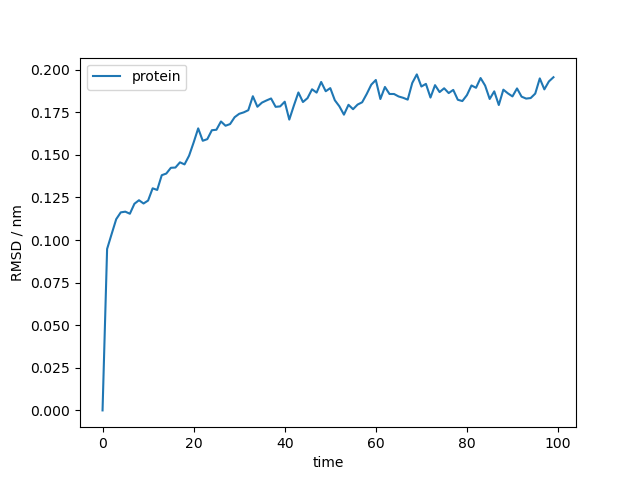

In [6]:
from IPython.display import Image
Image(filename=fig_path_1)

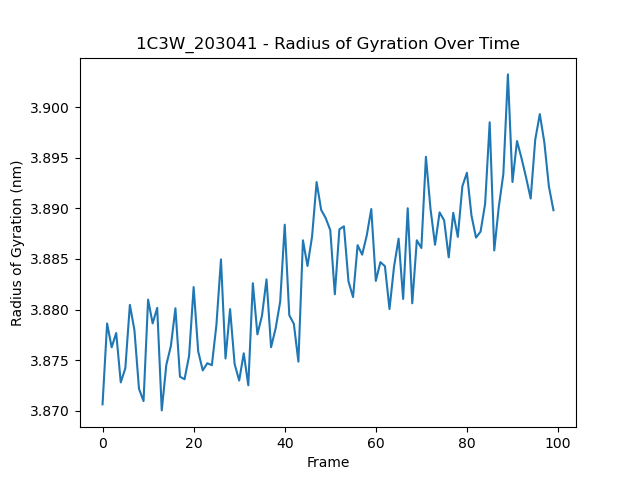

In [7]:
Image(filename=fig_path_2)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅
### Correct Answer  ✅